In [37]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
import pandas as pd
import pickle
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib

# os.chdir('/home/james/code/kernelcnp')
root = '/scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results'

In [60]:
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100 

In [61]:
models = ["GNP", 'ANP', "AGNP", "convGNP", "convNP", "FullConvGNP"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:olive", "tab:red", "tab:green"]
datas = ["eq", "matern", "noisy-mixture", "sawtooth", "weakly-periodic"]
markers = ["o", "x", "s"]
covs = ["innerprod-homo", "kvv-homo", "meanfield"]
seeds = ['0']
dims = ['1']

In [62]:
mean_field_models = ['ANP', 'convNP', 'FullConvGNP']

In [76]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(models, colours):
    for d in datas:
        for s in seeds:
            for dim in dims:
                for c, marker in zip(covs, markers):
                    if m in mean_field_models and c != "meanfield":
                        pass
                    else:          
                        experiment_name = os.path.join(f'{root}', 
                                                       f'{d}',
                                                       'models', 
                                                       f'{m}',
                                                       f'{c}',
                                                       f'seed-{s}',
                                                       f'dim-{dim}')

                        wd = WorkingDirectory(root=experiment_name, print_root=False)
                        experiments.append((d, m, c, s, colour, marker, wd.root, dim ))
                
row_labels.append("Oracle-GP")
row_labels.append("Oracle-GP-diag")
                
for m in models:
    for c in covs:
        if m in mean_field_models and c != "meanfield":
            continue
        else:
            row_labels.append(f'{m}-{c}')
        

for d in datas:
    column_labels.append(f'{d}')
    column_labels.append(f'{d}-error')
    column_labels.append(f'{d}-iterations')
    column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

In [85]:
for d in datas:
    experiment_name = os.path.join(f'{root}', 
                                   f'{d}',
                                   'models', 
                                   'Oracle-GP/seed-0/dim-1')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    
    if os.path.isfile(os.path.join(wd.root, 'test_nll_mean.txt')):
        mean = np.loadtxt(wd.file('test_nll_mean.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_nll_error.txt',
                                exists=True))/np.sqrt(2048)
        df.at["Oracle-GP", f'{d}'] = mean
        df.at["Oracle-GP", f'{d}-error'] = error
        
        mean = np.loadtxt(wd.file('test_diag_nll_mean.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_diag_nll_std.txt',
                                exists=True))/np.sqrt(2048)
        df.at["Oracle-GP-diag", f'{d}'] = mean
        df.at["Oracle-GP-diag", f'{d}-error'] = error
        
    else:
        print(f'No results {wd.root}')

No results /scratches/cblgpu07/em626/kernelcnp/kernelcnp/experiments/synthetic/results/sawtooth/models/Oracle-GP/seed-0/dim-1


In [87]:
for e in experiments:
    d, m, c, s, colour, marker, r, dim = e
    row_label = f'{m}-{c}'
    experiment_name = os.path.join(f'{root}', 
                                   f'{d}',
                                   'models', 
                                   f'{m}',
                                   f'{c}',
                                   f'seed-{s}',
                                   f'dim-{dim}')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))
        num_params = np.loadtxt(wd.file('num_params.txt',
                                exists=True))
        
        df.at[row_label, f'{d}-num-params'] = num_params
        
        df.at[row_label, f'{d}'] = mean
        df.at[row_label, f'{d}-error'] = error
        df.at[row_label, 'colour'] = colour
        df.at[row_label, 'marker'] = marker
    else:
        print(f'No results {wd.root}')
    
    if os.path.isfile(os.path.join(wd.root, 'last_epoch.txt')):
        iteration = np.loadtxt(wd.file('last_epoch.txt',
                                    exists=True))
        df.at[row_label, f'{d}-iterations'] = iteration



In [88]:
df

,eq,eq-error,eq-iterations,eq-num-params,matern,matern-error,matern-iterations,matern-num-params,noisy-mixture,noisy-mixture-error,...,sawtooth,sawtooth-error,sawtooth-iterations,sawtooth-num-params,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,marker,colour
Oracle-GP,1.4708933257216295,7.86958e-05,NaN,NaN,1.3593273004151387,9.53897e-05,NaN,NaN,1.1527714750093425,0.000165449,...,NaN,NaN,NaN,NaN,0.7050805030634204,0.000202751,NaN,NaN,NaN,NaN
Oracle-GP-diag,1.2839344689919507,0.000267614,NaN,NaN,1.075070087813096,0.000322327,NaN,NaN,0.578109282547963,0.000508311,...,NaN,NaN,NaN,NaN,0.08656737279396581,0.000424399,NaN,NaN,NaN,NaN
GNP-innerprod-homo,1.25105,0.0010508486199375688,101.0,182274.0,1.05815,0.0011824730548815683,101.0,182274.0,0.477235,0.0011624424476749178,...,-0.155702,0.0005128634515104406,101.0,182274.0,-1.15472,0.002123157934846382,101.0,182274.0,o,tab:blue
GNP-kvv-homo,1.16419,0.0008190203937628571,101.0,182404.0,0.990386,0.0009573798430822996,101.0,182404.0,0.473012,0.000919825510349524,...,0.0301014,0.0012949562874650252,101.0,182404.0,-0.769819,0.0022162848952159185,101.0,182404.0,x,tab:blue
GNP-meanfield,0.575102,0.011145861406276164,101.0,116354.0,0.25485,0.010530588261717096,101.0,116354.0,-0.81507,0.00830182109011445,...,-0.155878,0.0005141743089489149,101.0,116354.0,-1.1485,0.0030314384932142707,101.0,116354.0,s,tab:blue
ANP-meanfield,0.913553,0.005867091089652115,101.0,889219.0,0.500609,0.005988078862394183,101.0,889219.0,-0.690872,0.004720415745847501,...,-0.155878,0.0005125490621461079,101.0,889219.0,-0.303247,0.010421921647491792,101.0,889219.0,s,tab:orange
AGNP-innerprod-homo,1.41516,0.0023404930584705382,101.0,806018.0,1.01785,0.000862792388253163,101.0,806018.0,-0.282944,0.0068724825104336295,...,-0.15572,0.0005127195470134297,101.0,806018.0,-1.15658,0.0020759895787119415,101.0,806018.0,o,tab:purple
AGNP-kvv-homo,1.38987,0.0024978671687815785,101.0,806148.0,1.05162,0.002101062805480478,19.0,806148.0,0.790988,0.006210303348965664,...,-0.183942,0.0003610274078651802,5.0,806148.0,-0.275138,0.008242918525471111,101.0,806148.0,x,tab:purple
AGNP-meanfield,-0.758724,0.004236042016715878,101.0,740098.0,-0.850386,0.0035898690480457227,101.0,740098.0,-1.47653,0.0024911947756317853,...,-0.155853,0.000515674321166974,101.0,740098.0,-0.575173,0.009690428090896056,101.0,740098.0,s,tab:purple
convGNP-innerprod-homo,1.45568,0.0021524859515825966,101.0,55300.0,1.29575,0.004380239579598201,101.0,55300.0,0.55926,0.021840879180300896,...,1.30952,0.02498968047987725,101.0,55300.0,-0.30831,0.00929066875932003,101.0,55300.0,o,tab:olive


In [89]:
df['sawtooth']

Oracle-GP                       NaN
Oracle-GP-diag                  NaN
GNP-innerprod-homo        -0.155702
GNP-kvv-homo              0.0301014
GNP-meanfield             -0.155878
ANP-meanfield             -0.155878
AGNP-innerprod-homo        -0.15572
AGNP-kvv-homo             -0.183942
AGNP-meanfield            -0.155853
convGNP-innerprod-homo      1.30952
convGNP-kvv-homo            1.98109
convGNP-meanfield           1.94053
convNP-meanfield            2.50933
FullConvGNP-meanfield       1.66203
Name: sawtooth, dtype: object

In [90]:
def plot_results(d, df):
    plt.xticks([])
    x = np.arange(len(df[d]))
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    oracle_result = df[d]["Oracle-GP"]
    oracle_error = df[d + "-error"]["Oracle-GP"]
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    
    
    for i in range(1, len(x)):
        plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_result * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_result + oracle_error) * ones,
                     (oracle_result - oracle_error) * ones,
                     color='k', alpha=0.1)



    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    plt.title(d)
    plt.show()


ValueError: Unrecognized marker style nan

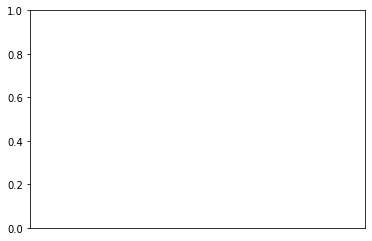

In [91]:
for d in datas:
    plot_results(d, df)

In [92]:
df.to_pickle("dataframe-camera-ready.pkl")